In [4]:
import csv

In [5]:
#Option 1 pour lire le fichier

fichier = open (r'pokemon.csv') #r=mode lecture
reader = csv.reader(fichier)
liste_pokemon = []
i = 0 #permet de ne pas afficher la ligne de titre
for row in reader: #row est une liste donc elle sera affichée dans la liste vide
    if i>0:
        liste_pokemon.append(row)
    i += 1

liste_pokemon #permet de print

[['Ecayon', '49', '49', 'Eau'],
 ['Tiplouf', '53', '51', 'Eau'],
 ['Carabaffe', '59', '63', 'Eau'],
 ['Prinplouf', '64', '66', 'Eau'],
 ['Gobou', '50', '70', 'Eau'],
 ['Gamblast', '71', '73', 'Eau'],
 ['Mateloutre', '75', '75', 'Eau'],
 ['Tarpaud', '90', '75', 'Eau'],
 ['Crocrodil', '65', '80', 'Eau'],
 ['Phione', '80', '80', 'Eau'],
 ['Rosabyss', '55', '84', 'Eau'],
 ['Bargantua', '70', '92', 'Eau'],
 ['Poissoroy', '80', '92', 'Eau'],
 ['Clamiral', '95', '100', 'Eau'],
 ['Octillery', '75', '105', 'Eau'],
 ['Aligatueur', '85', '105', 'Eau'],
 ['Nucleos', '45', '30', 'Psy'],
 ['Deoxys', '50', '70', 'Psy'],
 ['Deoxys', '50', '95', 'Psy'],
 ['Deoxys', '50', '150', 'Psy'],
 ['Deoxys', '50', '180', 'Psy'],
 ['Spoink', '60', '25', 'Psy'],
 ['Mesmerella', '60', '45', 'Psy'],
 ['Siderella', '70', '55', 'Psy'],
 ['Eoko', '75', '50', 'Psy'],
 ['Crefadet', '75', '125', 'Psy'],
 ['Munna', '76', '25', 'Psy'],
 ['Groret', '80', '45', 'Psy'],
 ['Okeoke', '95', '23', 'Psy'],
 ['Mew', '100', '100', 'Ps

In [6]:
#Option 2 pour lire le fichier
"""
with open('pokemon.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(', '.join(row))"""

"\nwith open('pokemon.csv', newline='') as csvfile:\n    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')\n    for row in spamreader:\n        print(', '.join(row))"

In [7]:
#Option 3 pour lire fichier
"""
with open('pokemon.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)"""

"\nwith open('pokemon.csv', newline='') as f:\n    reader = csv.reader(f)\n    for row in reader:\n        print(row)"

In [8]:
"""with open("pokemon.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # the below statement will skip the first row
    next(csv_reader)
    for lines in csv_reader:
      print(lines)"""

'with open("pokemon.csv", "r") as csv_file:\n    csv_reader = csv.reader(csv_file, delimiter=\',\')\n    # the below statement will skip the first row\n    next(csv_reader)\n    for lines in csv_reader:\n      print(lines)'

In [9]:
#Option 4 pour lire fichier
"""
with open('pokemon.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Nom'], row['Points de vie'], row['Attaque'], row['Type'])"""

"\nwith open('pokemon.csv', newline='') as csvfile:\n    reader = csv.DictReader(csvfile)\n    for row in reader:\n        print(row['Nom'], row['Points de vie'], row['Attaque'], row['Type'])"

In [10]:
import matplotlib.pyplot as plt


In [11]:
liste_pkmn_eau = [pokemon for pokemon in liste_pokemon if pokemon[3] == "Eau"]
liste_pkmn_psy = [pokemon for pokemon in liste_pokemon if pokemon[3] == "Psy"]

In [12]:
# Version plus longue de la liste par compréhention 
"""
liste_pkmn_eau = []
for pokemon in liste_pokemon:
    if pokemon[3] == "Eau": #3 càd son type, ici eau
        liste_pkmn_eau.append(pokemon)"""

'\nliste_pkmn_eau = []\nfor pokemon in liste_pokemon:\n    if pokemon[3] == "Eau": #3 càd son type, ici eau\n        liste_pkmn_eau.append(pokemon)'

In [13]:
#Créer les sous-listes pour l'affichage du nuage de points
liste_pv_eau = [int(pokemon[1]) for pokemon in liste_pkmn_eau]
liste_att_eau = [int(pokemon[2]) for pokemon in liste_pkmn_eau]
liste_pv_psy = [int(pokemon[1]) for pokemon in liste_pkmn_psy]
liste_att_psy = [int(pokemon[2]) for pokemon in liste_pkmn_psy]

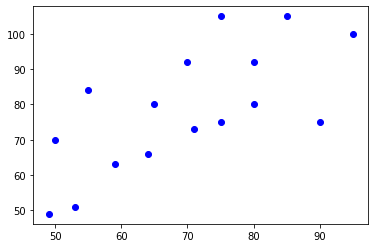

In [14]:
plt.plot(liste_pv_eau, liste_att_eau, "ob")
plt.show()

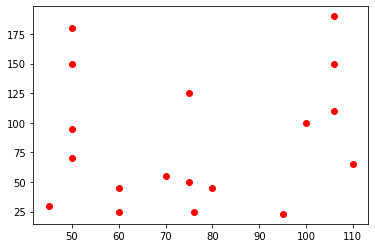

In [15]:
plt.plot(liste_pv_psy, liste_att_psy, "or")
plt.show()

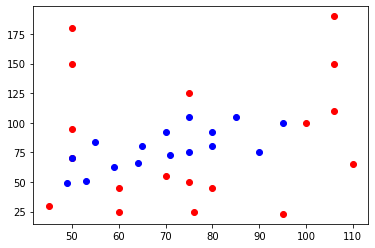

In [16]:
plt.plot(liste_pv_psy, liste_att_psy, "or")
plt.plot(liste_pv_eau, liste_att_eau, "ob")
plt.show()

In [17]:
#Créer une fonction pour calculer la distance
from math import sqrt
def distance(pokemon1, pokemon2):
    diff_pv = int(pokemon1[1]) - int(pokemon2[1])
    diff_att = int(pokemon1[2]) - int(pokemon2[2])
    return(sqrt((diff_pv **2)+(diff_att **2)))

    #OU en une ligne: return sqrt(((int(pokemon1[1])- int(pokemon2[1]))**2) + ((int(pokemon1[2]) - int(pokemon2[2]))**2))

    #FAUX: sqrt(((liste_pkmn_eau[i](int[liste_pv_eau])-liste_pkmn_eau[i](int[liste_att_eau]))**2)+((liste_pkmn_psy[i](int[liste_pv_psy])-liste_pkmn_psy[i](int[liste_att_psy]))**2))
    


In [18]:
#Créer la fonction KNN

import copy #pour travailler sur une copie et ne pas rajouter la distance à chaque tour

def tri_knn(liste_pokemon, cible, k):
    liste_triee = copy.deepcopy(liste_pokemon) #pour travailler sur une copie et ne pas rajouter la distance à chaque tour
    for pokemon in liste_triee:
        pokemon.append(distance(pokemon, cible))
    liste_triee.sort(key = lambda pkmn:pkmn[4])
    return liste_triee[0:k]

#test
tri_knn(liste_pokemon, ["???", 78, 122, None], 3)

[['Crefadet', '75', '125', 'Psy', 4.242640687119285],
 ['Octillery', '75', '105', 'Eau', 17.26267650163207],
 ['Aligatueur', '85', '105', 'Eau', 18.384776310850235]]

In [19]:
#créer fonction qui à partir de KNN donne le type de cible
def donner_type(cible, liste_pokemon):
    voisins = tri_knn(liste_pokemon, cible, 5)
    pkmn_eau = []
    pkmn_psy = []
    for voisin in voisins:
        if voisin[3] == "Psy":
            pkmn_psy.append(voisin)
        else:
            pkmn_eau.append(voisin)
    
    if len(pkmn_psy) > len(pkmn_eau):
        print("Le pokémon est de type psy")
    else:
        print("Le type est eau")

In [21]:
#Test
donner_type(["???", 70, 45, None], liste_pokemon)

Le pokémon est de type psy
